## World Cup Dataset

📌 Problem Statement — Cricket World Cup EDA Project
Cricket is one of the most popular sports in the world, especially in countries like India, Pakistan, Australia, and England. The Cricket World Cup is held every four years and attracts millions of fans.
In this project, you will analyze Cricket World Cup match data to discover trends, compare team performances, and visualize key statistics — no machine learning is required.


📂 Dataset Link:
https://www.kaggle.com/datasets/sidmalang/all-cricket-world-cup-match-result

🔍 EDA Questions to Answer:

1. Total number of matches played in the dataset.
2. Which team has the highest win percentage?
3. Which stadium hosted the most matches?
4. How many matches ended without a result?
5. Visualize runs scored trend by match number.

📌 Task Requirements:

Perform data cleaning if required.
Use Pandas for manipulation and Matplotlib / Seaborn for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("world_cup_2019.csv")

In [3]:
df.head()

,Id,Date,Match,Ground / Location,Result
0,1,30/05/2019,1st Match: England v South Africa,"Kennington Oval, London",England won by 104 runs
1,2,31/05/2019,2nd Match: Pakistan v West Indies,"Trent Bridge, Nottingham",West Indies won by 7 wickets
2,3,01/06/2019,3rd Match: New Zealand v Sri Lanka,"Sophia Gardens, Cardiff",New Zealand won by 10 wickets
3,4,01/06/2019,4th Match: Afghanistan v Australia,"County Ground, Bristol",Australia won by 7 wickets
4,5,02/06/2019,5th Match: Bangladesh v South Africa,"Kennington Oval, London",Bangladesh won by 21 runs


In [4]:
df.describe()

,Id
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


In [5]:
df.columns

Index(['Id', 'Date', 'Match', 'Ground / Location', 'Result'], dtype='object')

In [6]:
print(df.shape)


(48, 5)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 48 non-null     int64 
 1   Date               48 non-null     object
 2   Match              48 non-null     object
 3   Ground / Location  48 non-null     object
 4   Result             48 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


In [8]:
#convert date column into datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 48 non-null     int64         
 1   Date               48 non-null     datetime64[ns]
 2   Match              48 non-null     object        
 3   Ground / Location  48 non-null     object        
 4   Result             48 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ KB


In [9]:
# Total number of matches played in the dataset.
total_matches = df.shape[0]
print("the total number of matches played in the dataset is:", total_matches)


the total number of matches played in the dataset is: 48


In [ ]:
df = pd.read_csv("world_cup_2019.csv")

df['Winner'] = df['Result'].str.extract(r'^(.*?)\s+won')

print(df[['Match', 'Result', 'Winner']].head())

                                  Match                         Result  \
0     1st Match: England v South Africa        England won by 104 runs   
1     2nd Match: Pakistan v West Indies   West Indies won by 7 wickets   
2    3rd Match: New Zealand v Sri Lanka  New Zealand won by 10 wickets   
3    4th Match: Afghanistan v Australia     Australia won by 7 wickets   
4  5th Match: Bangladesh v South Africa      Bangladesh won by 21 runs   

        Winner  
0      England  
1  West Indies  
2  New Zealand  
3    Australia  
4   Bangladesh  


In [11]:
# Which team has the highest win percentage?
team_win_percentage = df['Winner'].value_counts(normalize=True) * 100
highest_win_percentage_team = team_win_percentage.idxmax()
highest_win_percentage = team_win_percentage.max()
print(f"The team with the highest win percentage is {highest_win_percentage_team} with a win percentage of {highest_win_percentage:.2f}%.")


The team with the highest win percentage is England with a win percentage of 18.18%.


In [12]:
# Which stadium hosted the most matches?
most_hosted_stadium = df['Ground / Location'].value_counts().idxmax()
print(most_hosted_stadium)

Old Trafford, Manchester


In [13]:
# How many matches ended without a result?
no_result_matches = df[df['Result'].str.contains('Match abandoned|No result', case=False, na=False)].shape[0]
print(f"Number of matches ended without a result: {no_result_matches}")

Number of matches ended without a result: 4


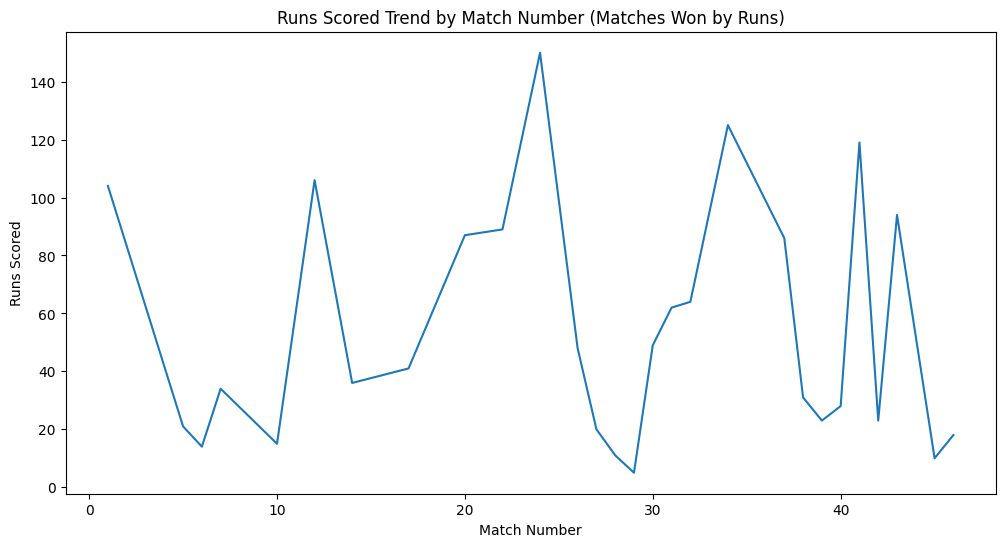

In [14]:
# Visualize runs scored trend by match number.

df['Runs_Scored'] = df['Result'].str.extract(r'by (\d+) runs').astype(float)

# Plot the runs scored trend by match number
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Id'], y=df['Runs_Scored'])
plt.title('Runs Scored Trend by Match Number (Matches Won by Runs)')
plt.xlabel('Match Number')
plt.ylabel('Runs Scored')
plt.show()